In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 

import seaborn as sns

pd.options.display.max_columns=999
pd.options.display.max_rows=999

# Escuelas

In [2]:
escuelas = pd.read_csv('../data/Directorio_Comprensivo_de_Escuelas_P_blicas__Puerto_Rico_2017.csv')

In [3]:
escuelas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132 entries, 0 to 1131
Data columns (total 57 columns):
TABLE_ID                              1132 non-null int64
CODIGO                                1132 non-null int64
ESCUELA                               1132 non-null object
REGION                                1132 non-null object
DISTRITO                              1132 non-null object
MUNICIPIO_ESCOLAR                     1118 non-null object
DIRECCIO_FISICA                       1118 non-null object
DIRECCION_MUNICIPIO                   1105 non-null object
DIRECCIO_ESTADO                       1104 non-null object
DIRECCION_ZIPCODE                     1104 non-null object
GEOLOCALIZACION                       1118 non-null object
TELEFONO                              1115 non-null object
FAX                                   1093 non-null object
DIRECTOR                              1117 non-null object
ZONA                                  1118 non-null object
ESTATUS_AC

Quedémonos con las escuelas que tienen información de # de estudiantes (non-null 'MATRICULA_TOTAL') 

In [4]:
escuelas.dropna(subset=['MATRICULA_TOTAL'], inplace=True)

In [5]:
escuelas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1102 entries, 0 to 1131
Data columns (total 57 columns):
TABLE_ID                              1102 non-null int64
CODIGO                                1102 non-null int64
ESCUELA                               1102 non-null object
REGION                                1102 non-null object
DISTRITO                              1102 non-null object
MUNICIPIO_ESCOLAR                     1102 non-null object
DIRECCIO_FISICA                       1102 non-null object
DIRECCION_MUNICIPIO                   1089 non-null object
DIRECCIO_ESTADO                       1088 non-null object
DIRECCION_ZIPCODE                     1088 non-null object
GEOLOCALIZACION                       1102 non-null object
TELEFONO                              1099 non-null object
FAX                                   1078 non-null object
DIRECTOR                              1101 non-null object
ZONA                                  1102 non-null object
ESTATUS_AC

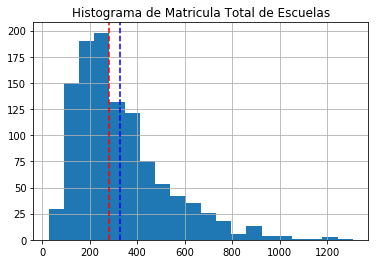

In [6]:
escuelas['MATRICULA_TOTAL'].hist(bins=20)
plt.axvline(x=escuelas['MATRICULA_TOTAL'].mean(), c='b', ls='dashed')
plt.axvline(x=escuelas['MATRICULA_TOTAL'].median(), c='r', ls='dashed')
plt.title('Histograma de Matricula Total de Escuelas');

In [7]:
print('Promedio de estudiantes matriculados por escuela: {}'.format(np.floor(escuelas['MATRICULA_TOTAL'].mean())))

Promedio de estudiantes matriculados por escuela: 329.0


# Resultados de pruebas: 

In [8]:
x = ['{}_[PROFICIENTE+AVANZADO]', '{}_PRE-BÁSICO', '{}_BÁSICO', '{}_PROFICIENTE', '{}_AVANZADO']
materias = ['ESPAÑOL', 'MATEMÁTICAS', 'INGLÉS']
d = {}
for materia in materias:
    d[materia] = [i.format(materia) for i in x]
    
materias = [i for j in list(d.values()) for i in j]
materias.append('BAJO_NIVEL_POBREZA')

for i in materias:
    escuelas[i] = escuelas[i].str.replace('%','').astype(float)

In [9]:
escuelas.head(1)

,TABLE_ID,CODIGO,ESCUELA,REGION,DISTRITO,MUNICIPIO_ESCOLAR,DIRECCIO_FISICA,DIRECCION_MUNICIPIO,DIRECCIO_ESTADO,DIRECCION_ZIPCODE,GEOLOCALIZACION,TELEFONO,FAX,DIRECTOR,ZONA,ESTATUS_ACTUAL,NIVEL_ORIGINAL,GRADOS_ORIGINAL,GRADOS_POSTERIOR,MATRICULA_TOTAL,GRADO_INFANT,GRADO_TODDLER,GRADO_PK,GRADO_PKE,GRADO_PKM,GRADO_K,GRADO_1,GRADO_2,GRADO_3,GRADO_4,GRADO_5,GRADO_6,GRADO_SGE,GRADO_7,GRADO_8,GRADO_9,GRADO_SGI,GRADO_10,GRADO_11,GRADO_12,GRADO_SGS,ESPAÑOL_[PROFICIENTE+AVANZADO],ESPAÑOL_PRE-BÁSICO,ESPAÑOL_BÁSICO,ESPAÑOL_PROFICIENTE,ESPAÑOL_AVANZADO,MATEMÁTICAS_[PROFICIENTE+AVANZADO],MATEMÁTICAS_PRE-BÁSICO,MATEMÁTICAS_BÁSICO,MATEMÁTICAS_PROFICIENTE,MATEMÁTICAS_AVANZADO,INGLÉS_[PROFICIENTE+AVANZADO],INGLÉS_PRE-BÁSICO,INGLÉS_BÁSICO,INGLÉS_PROFICIENTE,INGLÉS_AVANZADO,BAJO_NIVEL_POBREZA
0,1,35295,20 DE SEPTIEMBRE DE 1988,HUMACAO,FAJARDO,VIEQUES,CARR ESTATAL 200 ESQ CARR ESTATAL 993,VIEQUES,PR,00765-1554,"(18.14372, -65.44178)",741-3091,876-2804,MYRIAM R RODRIGUEZ RODRIGUEZ,URBANA,ABIERTA,INTERMEDIO,"7 - 9 , EEI","7 - 9 , EEI",218.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,NaN,71.0,61.0,NaN,12.0,NaN,NaN,NaN,NaN,21.56,40.83,37.61,14.68,6.88,1.38,45.87,52.75,1.38,0.0,19.27,54.59,26.15,14.22,5.05,86.24


Text(0,0.5,'Inglés Avanzado')

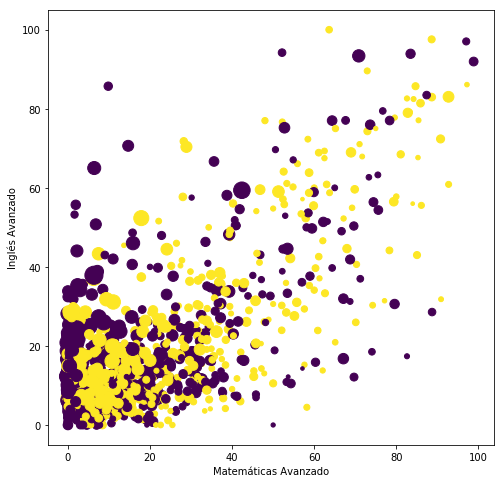

In [10]:
plt.figure(figsize=(8,8))
plt.scatter(escuelas['MATEMÁTICAS_AVANZADO'], escuelas['INGLÉS_AVANZADO'], 
            c=escuelas['ZONA'].map({'URBANA':1, 'RURAL':2}),
            s=escuelas['MATRICULA_TOTAL']*0.25)
plt.xlabel('Matemáticas Avanzado')
plt.ylabel('Inglés Avanzado')

Text(0,0.5,'Matemáticas\n(Proficiente/Avanzado)')

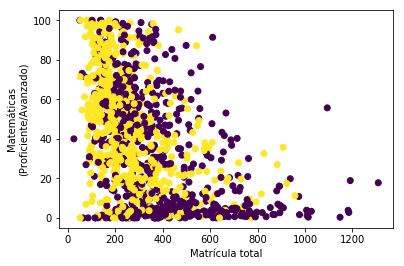

In [12]:
plt.scatter(escuelas['MATRICULA_TOTAL'], escuelas['MATEMÁTICAS_[PROFICIENTE+AVANZADO]'],
           c=escuelas['ZONA'].map({'URBANA':1, 'RURAL':2}))
plt.xlabel('Matrícula total')
plt.ylabel('Matemáticas\n(Proficiente/Avanzado)')

Text(0,0.5,'Español\n(Proficiente/Avanzado)')

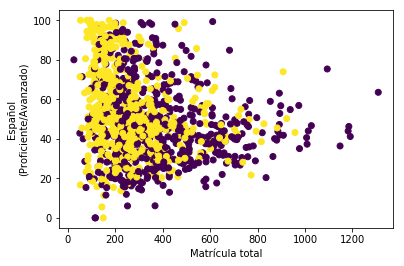

In [14]:
plt.scatter(escuelas['MATRICULA_TOTAL'], escuelas['ESPAÑOL_[PROFICIENTE+AVANZADO]'],
           c=escuelas['ZONA'].map({'URBANA':1, 'RURAL':2}))
plt.xlabel('Matrícula total')
plt.ylabel('Español\n(Proficiente/Avanzado)')

Text(0,0.5,'Inglés\n(Proficiente/Avanzado)')

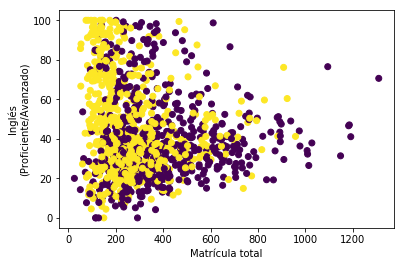

In [15]:
plt.scatter(escuelas['MATRICULA_TOTAL'], escuelas['INGLÉS_[PROFICIENTE+AVANZADO]'],
           c=escuelas['ZONA'].map({'URBANA':1, 'RURAL':2}))
plt.xlabel('Matrícula total')
plt.ylabel('Inglés\n(Proficiente/Avanzado)')

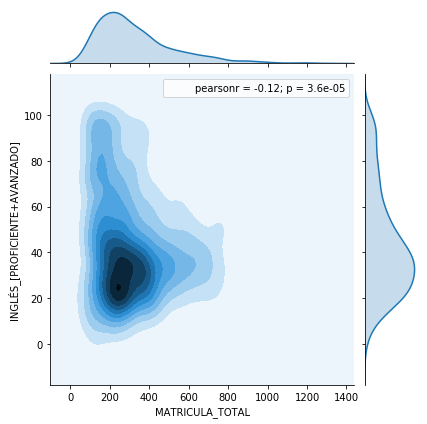

In [20]:
sns.jointplot(escuelas['MATRICULA_TOTAL'], escuelas['INGLÉS_[PROFICIENTE+AVANZADO]'], kind='kde')

Text(0,0.5,'Español Avanzado')

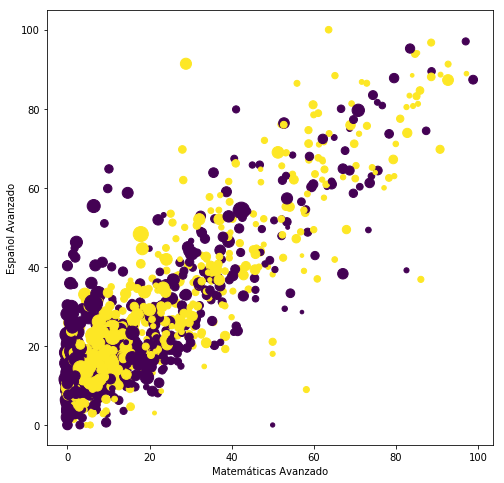

In [21]:
plt.figure(figsize=(8,8))
plt.scatter(escuelas['MATEMÁTICAS_AVANZADO'], escuelas['ESPAÑOL_AVANZADO'], 
            c=escuelas['ZONA'].map({'URBANA':1, 'RURAL':2}),
            s=escuelas['MATRICULA_TOTAL']*0.25)
plt.xlabel('Matemáticas Avanzado')
plt.ylabel('Español Avanzado')

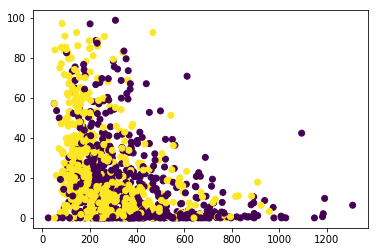

In [22]:
plt.scatter(escuelas['MATRICULA_TOTAL'], escuelas['MATEMÁTICAS_AVANZADO'],
            c = escuelas['ZONA'].map({'URBANA':1, 'RURAL':2}))

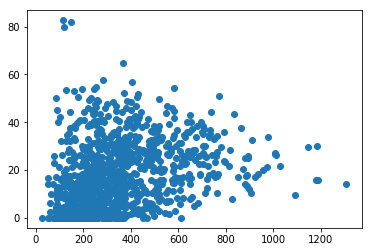

In [23]:
plt.scatter(escuelas['MATRICULA_TOTAL'], escuelas['MATEMÁTICAS_PRE-BÁSICO'])

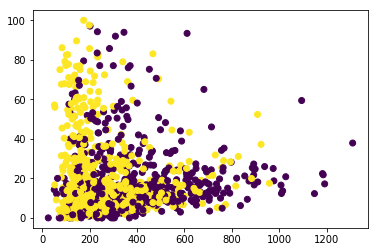

In [24]:
plt.scatter(escuelas['MATRICULA_TOTAL'], escuelas['INGLÉS_AVANZADO'],
            c = escuelas['ZONA'].map({'URBANA':1, 'RURAL':2}))

In [25]:
escuelas['ZONA'].value_counts(dropna=False)

URBANA    578
RURAL     524
Name: ZONA, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

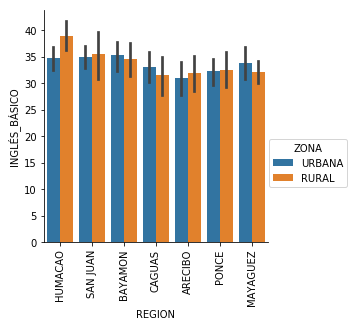

In [26]:
sns.factorplot(x='REGION', y='INGLÉS_BÁSICO', hue='ZONA', data=escuelas, kind='bar' )
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

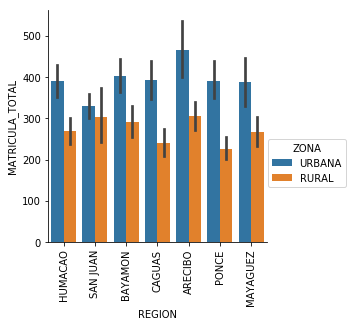

In [27]:
sns.factorplot(x='REGION', y='MATRICULA_TOTAL', hue='ZONA', data=escuelas, kind='bar' )
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

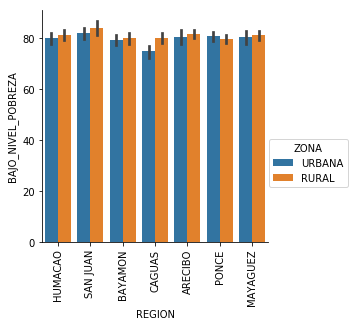

In [28]:
sns.factorplot(x='REGION', y='BAJO_NIVEL_POBREZA', hue='ZONA', data=escuelas, kind='bar' )
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

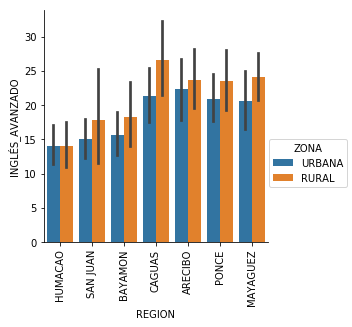

In [29]:
sns.factorplot(x='REGION', y='INGLÉS_AVANZADO', hue='ZONA', data=escuelas, kind='bar' )
plt.xticks(rotation=90)

In [30]:
escuelas.head(1)

,TABLE_ID,CODIGO,ESCUELA,REGION,DISTRITO,MUNICIPIO_ESCOLAR,DIRECCIO_FISICA,DIRECCION_MUNICIPIO,DIRECCIO_ESTADO,DIRECCION_ZIPCODE,GEOLOCALIZACION,TELEFONO,FAX,DIRECTOR,ZONA,ESTATUS_ACTUAL,NIVEL_ORIGINAL,GRADOS_ORIGINAL,GRADOS_POSTERIOR,MATRICULA_TOTAL,GRADO_INFANT,GRADO_TODDLER,GRADO_PK,GRADO_PKE,GRADO_PKM,GRADO_K,GRADO_1,GRADO_2,GRADO_3,GRADO_4,GRADO_5,GRADO_6,GRADO_SGE,GRADO_7,GRADO_8,GRADO_9,GRADO_SGI,GRADO_10,GRADO_11,GRADO_12,GRADO_SGS,ESPAÑOL_[PROFICIENTE+AVANZADO],ESPAÑOL_PRE-BÁSICO,ESPAÑOL_BÁSICO,ESPAÑOL_PROFICIENTE,ESPAÑOL_AVANZADO,MATEMÁTICAS_[PROFICIENTE+AVANZADO],MATEMÁTICAS_PRE-BÁSICO,MATEMÁTICAS_BÁSICO,MATEMÁTICAS_PROFICIENTE,MATEMÁTICAS_AVANZADO,INGLÉS_[PROFICIENTE+AVANZADO],INGLÉS_PRE-BÁSICO,INGLÉS_BÁSICO,INGLÉS_PROFICIENTE,INGLÉS_AVANZADO,BAJO_NIVEL_POBREZA
0,1,35295,20 DE SEPTIEMBRE DE 1988,HUMACAO,FAJARDO,VIEQUES,CARR ESTATAL 200 ESQ CARR ESTATAL 993,VIEQUES,PR,00765-1554,"(18.14372, -65.44178)",741-3091,876-2804,MYRIAM R RODRIGUEZ RODRIGUEZ,URBANA,ABIERTA,INTERMEDIO,"7 - 9 , EEI","7 - 9 , EEI",218.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,NaN,71.0,61.0,NaN,12.0,NaN,NaN,NaN,NaN,21.56,40.83,37.61,14.68,6.88,1.38,45.87,52.75,1.38,0.0,19.27,54.59,26.15,14.22,5.05,86.24


In [31]:
escuelas.dtypes.value_counts()

float64    38
object     17
int64       2
dtype: int64

In [32]:
# clean up something 
escuelas['DIRECCION_MUNICIPIO'] = escuelas['DIRECCION_MUNICIPIO'].str.replace('PUNTA SANTIAGO, HUMACAO', 'HUMACAO')

In [33]:
# objects
escuelas_object = escuelas.select_dtypes(include=[object])
escuelas_object.head()

,ESCUELA,REGION,DISTRITO,MUNICIPIO_ESCOLAR,DIRECCIO_FISICA,DIRECCION_MUNICIPIO,DIRECCIO_ESTADO,DIRECCION_ZIPCODE,GEOLOCALIZACION,TELEFONO,FAX,DIRECTOR,ZONA,ESTATUS_ACTUAL,NIVEL_ORIGINAL,GRADOS_ORIGINAL,GRADOS_POSTERIOR
0,20 DE SEPTIEMBRE DE 1988,HUMACAO,FAJARDO,VIEQUES,CARR ESTATAL 200 ESQ CARR ESTATAL 993,VIEQUES,PR,00765-1554,"(18.14372, -65.44178)",741-3091,876-2804,MYRIAM R RODRIGUEZ RODRIGUEZ,URBANA,ABIERTA,INTERMEDIO,"7 - 9 , EEI","7 - 9 , EEI"
1,ABELARDO DIAZ ALFARO,SAN JUAN,SAN JUAN II,SAN JUAN V,CARR 842 KM 6.4 CAIMITO ALTO,SAN JUAN,PR,00936-0000,"(18.31255, -66.06287)",720-0040,720-0040,HAYXA FELICIANO FERNANDEZ,RURAL,ABIERTA,ELEMENTAL,K - 6,K - 6
2,ABELARDO DIAZ ALFARO,BAYAMON,TOA BAJA,TOA ALTA,CARR. 828 AU. RAMAL BO. PINAS,TOA ALTA,PR,9530019,"(18.36274, -66.21927)",797-0315,797-4737,WILFREDO CARDONA,RURAL,ABIERTA,INTERMEDIO,"7 - 9 , EEI","7 - 9 , EEI"
3,ABELARDO DIAZ MORALES,CAGUAS,GURABO,CAGUAS I,URB. SANTA ELVIRA CALLE SANTA GERTRUDIS,CAGUAS,PR,00726-4952,"(18.23615, -66.01383)",743-9056,743-9056,CESAR AQUINO NIEVES,URBANA,ABIERTA,ELEMENTAL,K - 6,K - 6
4,ABELARDO MARTINEZ OTERO,ARECIBO,ARECIBO,ARECIBO II,VILLA LOS SANTOS CALLE 14 FINAL,ARECIBO,PR,00612-0000,"(18.46253, -66.74019)",879-2614,879-9109,EDGAR ORTIZ AHORRIO,URBANA,ABIERTA,SUPERIOR,10-12,10-12


In [34]:
escuelas_object.describe()

,ESCUELA,REGION,DISTRITO,MUNICIPIO_ESCOLAR,DIRECCIO_FISICA,DIRECCION_MUNICIPIO,DIRECCIO_ESTADO,DIRECCION_ZIPCODE,GEOLOCALIZACION,TELEFONO,FAX,DIRECTOR,ZONA,ESTATUS_ACTUAL,NIVEL_ORIGINAL,GRADOS_ORIGINAL,GRADOS_POSTERIOR
count,1102,1102,1102,1102,1102,1089,1088,1088,1102,1099,1078,1101,1102,1102,1102,1102,1102
unique,1004,7,28,89,1081,78,25,463,1100,1095,1072,1056,2,1,6,80,122
top,LUIS MUNOZ RIVERA,PONCE,SAN JUAN II,SAN JUAN IV,CALLE LUIS MUNOZ RIVERA,SAN JUAN,PR,00698-0000,"(18.13952, -66.26427)",849-2610,853-2125,VACANTE,URBANA,ABIERTA,ELEMENTAL,K - 6,K - 6
freq,13,174,62,26,5,106,1062,13,2,2,2,44,578,1102,579,228,192


In [35]:
escuelas_int = escuelas.select_dtypes(include=[int])

In [36]:
escuela_codigo_nombre = pd.DataFrame()
escuela_codigo_nombre['codigo'] = escuelas_int['CODIGO']
escuela_codigo_nombre['nombre'] = escuelas_object['ESCUELA']
escuela_codigo_nombre.set_index('codigo', inplace=True)
escuela_codigo_nombre.sort_index(inplace=True)

escuela_codigo_nombre.head()

,nombre
codigo,
10017,FELIX ROSARIO RIOS
10058,SU RAMON E BETANCES
10082,DR FRANCISCO SUSONI
10173,COTTO (ANEXO)
10207,DOLORES GOMEZ DE ROMAN


In [37]:
escuelas.head()

,TABLE_ID,CODIGO,ESCUELA,REGION,DISTRITO,MUNICIPIO_ESCOLAR,DIRECCIO_FISICA,DIRECCION_MUNICIPIO,DIRECCIO_ESTADO,DIRECCION_ZIPCODE,GEOLOCALIZACION,TELEFONO,FAX,DIRECTOR,ZONA,ESTATUS_ACTUAL,NIVEL_ORIGINAL,GRADOS_ORIGINAL,GRADOS_POSTERIOR,MATRICULA_TOTAL,GRADO_INFANT,GRADO_TODDLER,GRADO_PK,GRADO_PKE,GRADO_PKM,GRADO_K,GRADO_1,GRADO_2,GRADO_3,GRADO_4,GRADO_5,GRADO_6,GRADO_SGE,GRADO_7,GRADO_8,GRADO_9,GRADO_SGI,GRADO_10,GRADO_11,GRADO_12,GRADO_SGS,ESPAÑOL_[PROFICIENTE+AVANZADO],ESPAÑOL_PRE-BÁSICO,ESPAÑOL_BÁSICO,ESPAÑOL_PROFICIENTE,ESPAÑOL_AVANZADO,MATEMÁTICAS_[PROFICIENTE+AVANZADO],MATEMÁTICAS_PRE-BÁSICO,MATEMÁTICAS_BÁSICO,MATEMÁTICAS_PROFICIENTE,MATEMÁTICAS_AVANZADO,INGLÉS_[PROFICIENTE+AVANZADO],INGLÉS_PRE-BÁSICO,INGLÉS_BÁSICO,INGLÉS_PROFICIENTE,INGLÉS_AVANZADO,BAJO_NIVEL_POBREZA
0,1,35295,20 DE SEPTIEMBRE DE 1988,HUMACAO,FAJARDO,VIEQUES,CARR ESTATAL 200 ESQ CARR ESTATAL 993,VIEQUES,PR,00765-1554,"(18.14372, -65.44178)",741-3091,876-2804,MYRIAM R RODRIGUEZ RODRIGUEZ,URBANA,ABIERTA,INTERMEDIO,"7 - 9 , EEI","7 - 9 , EEI",218.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,NaN,71.0,61.0,NaN,12.0,NaN,NaN,NaN,NaN,21.56,40.83,37.61,14.68,6.88,1.38,45.87,52.75,1.38,0.00,19.27,54.59,26.15,14.22,5.05,86.24
1,2,62844,ABELARDO DIAZ ALFARO,SAN JUAN,SAN JUAN II,SAN JUAN V,CARR 842 KM 6.4 CAIMITO ALTO,SAN JUAN,PR,00936-0000,"(18.31255, -66.06287)",720-0040,720-0040,HAYXA FELICIANO FERNANDEZ,RURAL,ABIERTA,ELEMENTAL,K - 6,K - 6,135.0,NaN,NaN,NaN,NaN,NaN,16.0,22.0,20.0,19.0,19.0,19.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.43,1.30,27.27,35.06,36.36,61.04,5.19,33.77,25.97,35.06,59.74,5.19,35.06,45.45,14.29,68.22
2,3,74864,ABELARDO DIAZ ALFARO,BAYAMON,TOA BAJA,TOA ALTA,CARR. 828 AU. RAMAL BO. PINAS,TOA ALTA,PR,9530019,"(18.36274, -66.21927)",797-0315,797-4737,WILFREDO CARDONA,RURAL,ABIERTA,INTERMEDIO,"7 - 9 , EEI","7 - 9 , EEI",576.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162.0,NaN,198.0,178.0,NaN,38.0,NaN,NaN,NaN,NaN,32.71,21.95,45.34,20.08,12.63,2.28,33.54,64.18,2.07,0.21,31.06,30.02,38.92,21.33,9.73,76.74
3,4,20578,ABELARDO DIAZ MORALES,CAGUAS,GURABO,CAGUAS I,URB. SANTA ELVIRA CALLE SANTA GERTRUDIS,CAGUAS,PR,00726-4952,"(18.23615, -66.01383)",743-9056,743-9056,CESAR AQUINO NIEVES,URBANA,ABIERTA,ELEMENTAL,K - 6,K - 6,656.0,NaN,NaN,NaN,NaN,NaN,70.0,80.0,112.0,81.0,114.0,108.0,91.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.27,15.47,44.27,24.53,15.73,33.33,16.80,49.87,23.47,9.87,30.13,21.07,48.80,18.40,11.73,69.15
4,5,15784,ABELARDO MARTINEZ OTERO,ARECIBO,ARECIBO,ARECIBO II,VILLA LOS SANTOS CALLE 14 FINAL,ARECIBO,PR,00612-0000,"(18.46253, -66.74019)",879-2614,879-9109,EDGAR ORTIZ AHORRIO,URBANA,ABIERTA,SUPERIOR,10-12,10-12,465.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.0,NaN,129.0,126.0,105.0,NaN,68.85,2.46,28.69,38.52,30.33,0.83,5.79,93.39,0.83,0.00,63.64,8.26,28.10,29.75,33.88,65.44


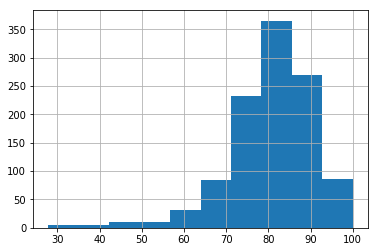

In [38]:
escuelas['BAJO_NIVEL_POBREZA'].hist()

In [39]:
# import sys

# sys.path.append('/Users/caoba/projects/puertorico/src')

# import utils
# utils.load_data()

In [40]:
# # Pobreza: # de estudiates bajo el nivel de pobreza en cada escuela publica

# pobreza = pd.read_csv('../data/N_mero_de_estudiantes_bajo_el_nivel_de_pobreza_en_cada_escuela_p_blica__a_o_escolar_2013-2014.csv')

# pobreza.info()

# pobreza['%'] = pobreza['Porcentaje de Estudiantes Bajo el Nivel de Pobreza (BNP)'].str.replace('%', '').astype(float)

# pd.qcut(pobreza['%'], q=5).value_counts().sort_index()

# #80% de las escuelas tienen más de 71.6% estudiantes bajo en nivel de probreza. 

# pobreza = pobreza.iloc[:1442]
# pobreza.groupby('Región').mean()['%']

# pobreza.groupby(['Región', 'Distrito']).mean()['%']

# pobreza['Matrícula M1 entre 5 y 17 años de edad'].hist(alpha=0.5)
# pobreza['M1 entre 5 y 17 años de edad Bajo Nivel Pobreza'].hist(alpha=0.5)
# plt.title('Histograma de Matrícula M1 entre 5 y 17 años de edad\n Todas las escuelas')
# plt.legend(['total', 'bajo el nivel de probreza'])
# plt.axvline(x = pobreza['Matrícula M1 entre 5 y 17 años de edad'].mean(), c='b', ls='dashed')
# plt.axvline(x = pobreza['M1 entre 5 y 17 años de edad Bajo Nivel Pobreza'].mean(), c='g', ls='dashed')
# plt.xlabel('número de estudiantes')
# plt.ylabel('número de escuelas')

# pobreza['Matrícula M1 entre 5 y 17 años de edad'].mean()

# pobreza['M1 entre 5 y 17 años de edad Bajo Nivel Pobreza'].mean()

# pobreza['ratio'] = pobreza['M1 entre 5 y 17 años de edad Bajo Nivel Pobreza']/pobreza['Matrícula M1 entre 5 y 17 años de edad']

# pobreza['ratio'].hist(bins=20)
# plt.axvline(x=pobreza['ratio'].mean(), c='b', ls='dashed')
# plt.axvline(x=pobreza['ratio'].median(), c='b', ls='dotted')

# pd.qcut(pobreza['ratio'], q=5).value_counts().sort_index()

# pobreza['ratio'].mean()

# # Matrícula promedio de una escuela (5 - 17 años) : 283 estudiantes
# # 
# # Matrícula promedio de una escuela (5 - 17 años): Estudiantes Bajo Nivel Pobreza: 218. 
# # 
# # Proporción promedio de estudiantes BNP a estudiantes, 5 - 17 años: 78.5%. 
# # 
# # Alrededor de 80% de las escuelas tienen más de 71.6% de sus estudiantes de 5 - 17 años matriculados bajo el nivel de pobreza.  

# pobreza['ratio_matricula'] = pobreza['Matrícula M1 entre 5 y 17 años de edad']/pobreza['Matrícula M1']

# pobreza['ratio_matricula'].hist()

# pobreza['ratio_matricula'].idxmin()

# # escuelas[escuelas['GRADOS_ORIGINAL'] == '42889']
# # escuelas[escuelas['CODIGO'] == 32300]

# pobreza.iloc[651]

# pobreza[['Código de la Escuela', 'Nombre Escuela']].head()


# pobreza_codigo_nombre = pobreza[['Código de la Escuela', 'Nombre Escuela']]
# pobreza_codigo_nombre.rename(columns={'Código de la Escuela':'codigo', 'Nombre Escuela':'nombre'}, inplace=True)
# #pobreza_codigo_nombre.set_index('codigo', inplace=True)
# pobreza_codigo_nombre.head()

# pobreza_codigo_nombre.shape

# pobreza_codigo_nombre.shape[0] - escuela_codigo_nombre.shape[0]

# # Un dataset es del 2013 y otro del 2017. ¿Se cerraron/consolidaron 310 escuelas desde entonces?

# df = pd.merge(pobreza_codigo_nombre, escuela_codigo_nombre, how='outer', on='codigo', suffixes=('_2013', '_2017'))

# pobreza.head(1)

# pobreza.groupby('Región').mean()['%']

# pobreza.groupby('Distrito').mean()['%'].nlargest(10)

# pobreza.groupby('Municipio Escolar').mean()['%'].nlargest(10)

# pobreza.groupby('Municipio Escolar').mean()['%'].nsmallest(10)

# num_escuelas_municipio_escolar = pobreza.groupby(['Región', 'Distrito', 'Municipio Escolar']).size().to_frame('#')

# num_escuelas_municipio_escolar.shape

# num_escuelas_municipio_escolar['#'].hist()
# plt.axvline(x=num_escuelas_municipio_escolar['#'].mean(), c='b', ls='dashed')
# plt.title('Histograma de numero de escuelas por municipio escolar');
# plt.xlabel('numero de escuelas')
# plt.ylabel('frecuencia')

In [41]:
escuela_codigo_nombre.shape

(1102, 1)

In [42]:
escuela_codigo_nombre.reset_index(inplace=True)
escuela_codigo_nombre.head()

,codigo,nombre
0,10017,FELIX ROSARIO RIOS
1,10058,SU RAMON E BETANCES
2,10082,DR FRANCISCO SUSONI
3,10173,COTTO (ANEXO)
4,10207,DOLORES GOMEZ DE ROMAN


### Clean zipcodes

In [43]:
escuelas['DIRECCION_ZIPCODE'].dtype

dtype('O')

In [44]:
escuelas['DIRECCION_ZIPCODE'].head(10)

0    00765-1554
1    00936-0000
2       9530019
3    00726-4952
4    00612-0000
5    00731-0000
6    00902-3347
7    00783-0000
8       7140164
9    00785-0000
Name: DIRECCION_ZIPCODE, dtype: object

In [45]:
def extract_zip_z4(x):
    try:
        if '-' in x:
            zip_ = x.split('-')[0]
            z4 = x.split('-')[1]
        else:
            zip_ = x[:-4]
            z4 = x[-4:]
    
        if len(zip_)!=5:
            zip_ = zip_.zfill(5)
        
        return zip_, z4
    except:
        return None

In [46]:
escuelas['zipcode'] = escuelas['DIRECCION_ZIPCODE'].apply(lambda x: extract_zip_z4(x))

In [47]:
escuelas['zipcode'].head(10)

0    (00765, 1554)
1    (00936, 0000)
2    (00953, 0019)
3    (00726, 4952)
4    (00612, 0000)
5    (00731, 0000)
6    (00902, 3347)
7    (00783, 0000)
8    (00714, 0164)
9    (00785, 0000)
Name: zipcode, dtype: object

In [48]:
escuelas['zip'] = escuelas['zipcode'].apply(lambda x:x[0] if pd.notnull(x) else None)
escuelas['z4'] = escuelas['zipcode'].apply(lambda x:x[1] if pd.notnull(x) else None)

In [49]:
escuelas.head(1)

,TABLE_ID,CODIGO,ESCUELA,REGION,DISTRITO,MUNICIPIO_ESCOLAR,DIRECCIO_FISICA,DIRECCION_MUNICIPIO,DIRECCIO_ESTADO,DIRECCION_ZIPCODE,GEOLOCALIZACION,TELEFONO,FAX,DIRECTOR,ZONA,ESTATUS_ACTUAL,NIVEL_ORIGINAL,GRADOS_ORIGINAL,GRADOS_POSTERIOR,MATRICULA_TOTAL,GRADO_INFANT,GRADO_TODDLER,GRADO_PK,GRADO_PKE,GRADO_PKM,GRADO_K,GRADO_1,GRADO_2,GRADO_3,GRADO_4,GRADO_5,GRADO_6,GRADO_SGE,GRADO_7,GRADO_8,GRADO_9,GRADO_SGI,GRADO_10,GRADO_11,GRADO_12,GRADO_SGS,ESPAÑOL_[PROFICIENTE+AVANZADO],ESPAÑOL_PRE-BÁSICO,ESPAÑOL_BÁSICO,ESPAÑOL_PROFICIENTE,ESPAÑOL_AVANZADO,MATEMÁTICAS_[PROFICIENTE+AVANZADO],MATEMÁTICAS_PRE-BÁSICO,MATEMÁTICAS_BÁSICO,MATEMÁTICAS_PROFICIENTE,MATEMÁTICAS_AVANZADO,INGLÉS_[PROFICIENTE+AVANZADO],INGLÉS_PRE-BÁSICO,INGLÉS_BÁSICO,INGLÉS_PROFICIENTE,INGLÉS_AVANZADO,BAJO_NIVEL_POBREZA,zipcode,zip,z4
0,1,35295,20 DE SEPTIEMBRE DE 1988,HUMACAO,FAJARDO,VIEQUES,CARR ESTATAL 200 ESQ CARR ESTATAL 993,VIEQUES,PR,00765-1554,"(18.14372, -65.44178)",741-3091,876-2804,MYRIAM R RODRIGUEZ RODRIGUEZ,URBANA,ABIERTA,INTERMEDIO,"7 - 9 , EEI","7 - 9 , EEI",218.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,NaN,71.0,61.0,NaN,12.0,NaN,NaN,NaN,NaN,21.56,40.83,37.61,14.68,6.88,1.38,45.87,52.75,1.38,0.0,19.27,54.59,26.15,14.22,5.05,86.24,"(00765, 1554)",00765,1554


In [50]:
escuelas['GEOLOCALIZACION'] = escuelas['GEOLOCALIZACION'].str.replace('(','')
escuelas['GEOLOCALIZACION'] = escuelas['GEOLOCALIZACION'].str.replace(')','')
escuelas['GEOLOCALIZACION'] = escuelas['GEOLOCALIZACION'].str.split(', ')

In [54]:
escuelas['GEOLOCALIZACION'].head()

0    [18.14372, -65.44178]
1    [18.31255, -66.06287]
2    [18.36274, -66.21927]
3    [18.23615, -66.01383]
4    [18.46253, -66.74019]
Name: GEOLOCALIZACION, dtype: object

In [55]:
escuelas['longitud'] = escuelas['GEOLOCALIZACION'].apply(lambda x: x[0] if np.all(pd.notnull(x)) else None).astype(float)
escuelas['latitud'] = escuelas['GEOLOCALIZACION'].apply(lambda x: x[1] if np.all(pd.notnull(x)) else None).astype(float)

In [56]:
escuelas['ZONA'].value_counts(dropna=False)

URBANA    578
RURAL     524
Name: ZONA, dtype: int64

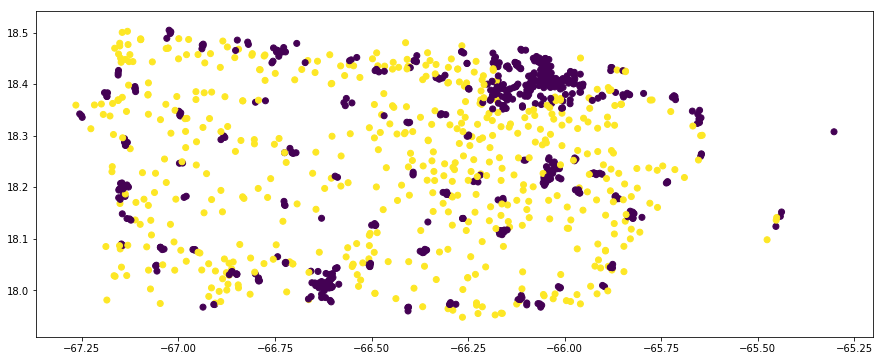

In [57]:
plt.figure(figsize=(15,6))
plt.scatter(escuelas['latitud'], escuelas['longitud'], marker='o', c=escuelas['ZONA'].map({'URBANA':1,
                                                                                           'RURAL':2,
                                                                                           np.nan: 3}))

In [58]:
escuelas.head(1)

,TABLE_ID,CODIGO,ESCUELA,REGION,DISTRITO,MUNICIPIO_ESCOLAR,DIRECCIO_FISICA,DIRECCION_MUNICIPIO,DIRECCIO_ESTADO,DIRECCION_ZIPCODE,GEOLOCALIZACION,TELEFONO,FAX,DIRECTOR,ZONA,ESTATUS_ACTUAL,NIVEL_ORIGINAL,GRADOS_ORIGINAL,GRADOS_POSTERIOR,MATRICULA_TOTAL,GRADO_INFANT,GRADO_TODDLER,GRADO_PK,GRADO_PKE,GRADO_PKM,GRADO_K,GRADO_1,GRADO_2,GRADO_3,GRADO_4,GRADO_5,GRADO_6,GRADO_SGE,GRADO_7,GRADO_8,GRADO_9,GRADO_SGI,GRADO_10,GRADO_11,GRADO_12,GRADO_SGS,ESPAÑOL_[PROFICIENTE+AVANZADO],ESPAÑOL_PRE-BÁSICO,ESPAÑOL_BÁSICO,ESPAÑOL_PROFICIENTE,ESPAÑOL_AVANZADO,MATEMÁTICAS_[PROFICIENTE+AVANZADO],MATEMÁTICAS_PRE-BÁSICO,MATEMÁTICAS_BÁSICO,MATEMÁTICAS_PROFICIENTE,MATEMÁTICAS_AVANZADO,INGLÉS_[PROFICIENTE+AVANZADO],INGLÉS_PRE-BÁSICO,INGLÉS_BÁSICO,INGLÉS_PROFICIENTE,INGLÉS_AVANZADO,BAJO_NIVEL_POBREZA,zipcode,zip,z4,longitud,latitud
0,1,35295,20 DE SEPTIEMBRE DE 1988,HUMACAO,FAJARDO,VIEQUES,CARR ESTATAL 200 ESQ CARR ESTATAL 993,VIEQUES,PR,00765-1554,"[18.14372, -65.44178]",741-3091,876-2804,MYRIAM R RODRIGUEZ RODRIGUEZ,URBANA,ABIERTA,INTERMEDIO,"7 - 9 , EEI","7 - 9 , EEI",218.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,NaN,71.0,61.0,NaN,12.0,NaN,NaN,NaN,NaN,21.56,40.83,37.61,14.68,6.88,1.38,45.87,52.75,1.38,0.0,19.27,54.59,26.15,14.22,5.05,86.24,"(00765, 1554)",00765,1554,18.14372,-65.44178


In [59]:
z_bnp = (escuelas['BAJO_NIVEL_POBREZA'] - escuelas['BAJO_NIVEL_POBREZA'].mean())/escuelas['BAJO_NIVEL_POBREZA'].std()

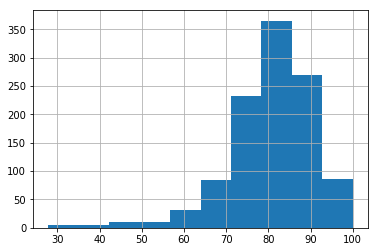

In [63]:
escuelas['BAJO_NIVEL_POBREZA'].hist()

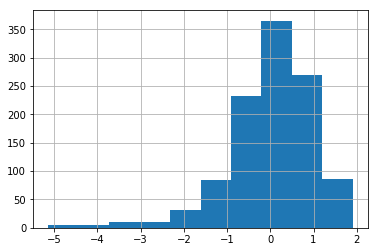

In [64]:
z_bnp.hist()

In [65]:
plt.rcParams['image.cmap'] = 'cool'

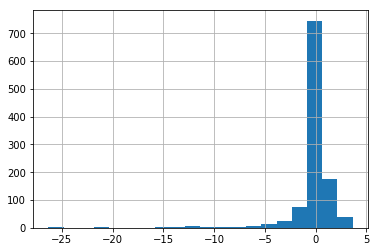

In [66]:
(np.sign(z_bnp)*z_bnp*z_bnp).hist(bins=20)

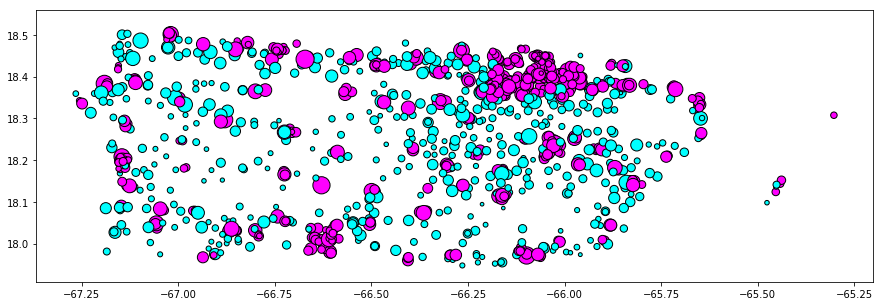

In [67]:
plt.figure(figsize=(15,5))
plt.scatter(escuelas['latitud'], escuelas['longitud'], 
            marker='o', 
            s=escuelas['MATRICULA_TOTAL']*0.25, 
            c=escuelas['ZONA'].map({'URBANA': 2,'RURAL':1,np.nan: 3}),
            edgecolor='k')

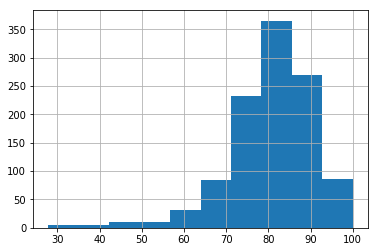

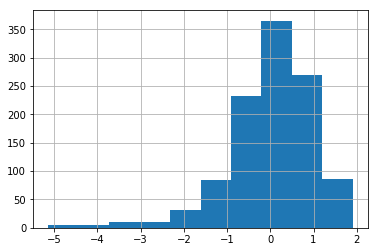

In [68]:
plt.figure(1)
escuelas['BAJO_NIVEL_POBREZA'].hist()
plt.figure(2)
z_bnp.hist()

In [69]:
escuelas.head(1)

,TABLE_ID,CODIGO,ESCUELA,REGION,DISTRITO,MUNICIPIO_ESCOLAR,DIRECCIO_FISICA,DIRECCION_MUNICIPIO,DIRECCIO_ESTADO,DIRECCION_ZIPCODE,GEOLOCALIZACION,TELEFONO,FAX,DIRECTOR,ZONA,ESTATUS_ACTUAL,NIVEL_ORIGINAL,GRADOS_ORIGINAL,GRADOS_POSTERIOR,MATRICULA_TOTAL,GRADO_INFANT,GRADO_TODDLER,GRADO_PK,GRADO_PKE,GRADO_PKM,GRADO_K,GRADO_1,GRADO_2,GRADO_3,GRADO_4,GRADO_5,GRADO_6,GRADO_SGE,GRADO_7,GRADO_8,GRADO_9,GRADO_SGI,GRADO_10,GRADO_11,GRADO_12,GRADO_SGS,ESPAÑOL_[PROFICIENTE+AVANZADO],ESPAÑOL_PRE-BÁSICO,ESPAÑOL_BÁSICO,ESPAÑOL_PROFICIENTE,ESPAÑOL_AVANZADO,MATEMÁTICAS_[PROFICIENTE+AVANZADO],MATEMÁTICAS_PRE-BÁSICO,MATEMÁTICAS_BÁSICO,MATEMÁTICAS_PROFICIENTE,MATEMÁTICAS_AVANZADO,INGLÉS_[PROFICIENTE+AVANZADO],INGLÉS_PRE-BÁSICO,INGLÉS_BÁSICO,INGLÉS_PROFICIENTE,INGLÉS_AVANZADO,BAJO_NIVEL_POBREZA,zipcode,zip,z4,longitud,latitud
0,1,35295,20 DE SEPTIEMBRE DE 1988,HUMACAO,FAJARDO,VIEQUES,CARR ESTATAL 200 ESQ CARR ESTATAL 993,VIEQUES,PR,00765-1554,"[18.14372, -65.44178]",741-3091,876-2804,MYRIAM R RODRIGUEZ RODRIGUEZ,URBANA,ABIERTA,INTERMEDIO,"7 - 9 , EEI","7 - 9 , EEI",218.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,NaN,71.0,61.0,NaN,12.0,NaN,NaN,NaN,NaN,21.56,40.83,37.61,14.68,6.88,1.38,45.87,52.75,1.38,0.0,19.27,54.59,26.15,14.22,5.05,86.24,"(00765, 1554)",00765,1554,18.14372,-65.44178


In [70]:
escuelas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1102 entries, 0 to 1131
Data columns (total 62 columns):
TABLE_ID                              1102 non-null int64
CODIGO                                1102 non-null int64
ESCUELA                               1102 non-null object
REGION                                1102 non-null object
DISTRITO                              1102 non-null object
MUNICIPIO_ESCOLAR                     1102 non-null object
DIRECCIO_FISICA                       1102 non-null object
DIRECCION_MUNICIPIO                   1089 non-null object
DIRECCIO_ESTADO                       1088 non-null object
DIRECCION_ZIPCODE                     1088 non-null object
GEOLOCALIZACION                       1102 non-null object
TELEFONO                              1099 non-null object
FAX                                   1078 non-null object
DIRECTOR                              1101 non-null object
ZONA                                  1102 non-null object
ESTATUS_AC

- 'MATRICULA TOTAL'
- 'MATERIAS'
- 'GRADOS' 
- 'POBREZA'

In [71]:
materias.pop(materias.index('BAJO_NIVEL_POBREZA')) #percentage

'BAJO_NIVEL_POBREZA'

In [72]:
materias

['ESPAÑOL_[PROFICIENTE+AVANZADO]',
 'ESPAÑOL_PRE-BÁSICO',
 'ESPAÑOL_BÁSICO',
 'ESPAÑOL_PROFICIENTE',
 'ESPAÑOL_AVANZADO',
 'MATEMÁTICAS_[PROFICIENTE+AVANZADO]',
 'MATEMÁTICAS_PRE-BÁSICO',
 'MATEMÁTICAS_BÁSICO',
 'MATEMÁTICAS_PROFICIENTE',
 'MATEMÁTICAS_AVANZADO',
 'INGLÉS_[PROFICIENTE+AVANZADO]',
 'INGLÉS_PRE-BÁSICO',
 'INGLÉS_BÁSICO',
 'INGLÉS_PROFICIENTE',
 'INGLÉS_AVANZADO']

In [73]:
df_materias = escuelas[materias]

In [74]:
df_materias.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1102 entries, 0 to 1131
Data columns (total 15 columns):
ESPAÑOL_[PROFICIENTE+AVANZADO]        1101 non-null float64
ESPAÑOL_PRE-BÁSICO                    1101 non-null float64
ESPAÑOL_BÁSICO                        1101 non-null float64
ESPAÑOL_PROFICIENTE                   1101 non-null float64
ESPAÑOL_AVANZADO                      1101 non-null float64
MATEMÁTICAS_[PROFICIENTE+AVANZADO]    1101 non-null float64
MATEMÁTICAS_PRE-BÁSICO                1101 non-null float64
MATEMÁTICAS_BÁSICO                    1101 non-null float64
MATEMÁTICAS_PROFICIENTE               1101 non-null float64
MATEMÁTICAS_AVANZADO                  1101 non-null float64
INGLÉS_[PROFICIENTE+AVANZADO]         1101 non-null float64
INGLÉS_PRE-BÁSICO                     1101 non-null float64
INGLÉS_BÁSICO                         1101 non-null float64
INGLÉS_PROFICIENTE                    1101 non-null float64
INGLÉS_AVANZADO                       1101 non-null f

In [75]:
escuelas.shape

(1102, 62)

In [76]:
escuelas = escuelas.drop(index = df_materias[df_materias['ESPAÑOL_BÁSICO'].isnull()].index)

In [77]:
df_materias = escuelas[materias]

In [78]:
df_materias.head()

,ESPAÑOL_[PROFICIENTE+AVANZADO],ESPAÑOL_PRE-BÁSICO,ESPAÑOL_BÁSICO,ESPAÑOL_PROFICIENTE,ESPAÑOL_AVANZADO,MATEMÁTICAS_[PROFICIENTE+AVANZADO],MATEMÁTICAS_PRE-BÁSICO,MATEMÁTICAS_BÁSICO,MATEMÁTICAS_PROFICIENTE,MATEMÁTICAS_AVANZADO,INGLÉS_[PROFICIENTE+AVANZADO],INGLÉS_PRE-BÁSICO,INGLÉS_BÁSICO,INGLÉS_PROFICIENTE,INGLÉS_AVANZADO
0,21.56,40.83,37.61,14.68,6.88,1.38,45.87,52.75,1.38,0.00,19.27,54.59,26.15,14.22,5.05
1,71.43,1.30,27.27,35.06,36.36,61.04,5.19,33.77,25.97,35.06,59.74,5.19,35.06,45.45,14.29
2,32.71,21.95,45.34,20.08,12.63,2.28,33.54,64.18,2.07,0.21,31.06,30.02,38.92,21.33,9.73
3,40.27,15.47,44.27,24.53,15.73,33.33,16.80,49.87,23.47,9.87,30.13,21.07,48.80,18.40,11.73
4,68.85,2.46,28.69,38.52,30.33,0.83,5.79,93.39,0.83,0.00,63.64,8.26,28.10,29.75,33.88


In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

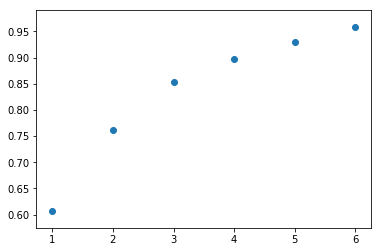

In [104]:
ss = StandardScaler()
x_materias = ss.fit_transform(df_materias)
pca = PCA(0.95, whiten=True)
x_materias = pca.fit_transform(x_materias)

plt.scatter(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_.cumsum())

In [105]:
pca.n_components_

6

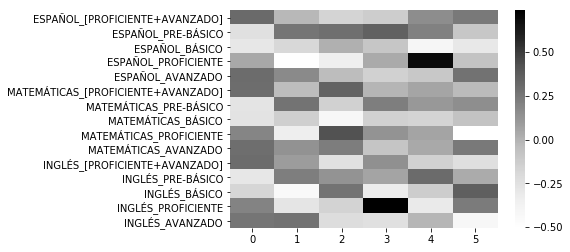

In [106]:
sns.heatmap(pca.components_.transpose(), yticklabels=df_materias.columns, cmap='Greys')

In [107]:
x_materias.shape

(1101, 6)

In [108]:
from sklearn.cluster import KMeans
km = KMeans(5)

km.fit(x_materias)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [109]:
from sklearn.metrics import silhouette_score, silhouette_samples

In [110]:
silhouette_score(x_materias, labels = km.labels_)

0.20683134903640182

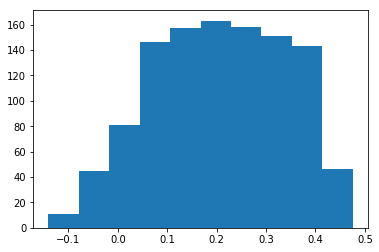

In [111]:
plt.hist(silhouette_samples(x_materias, labels = km.labels_));

In [112]:
np.sort(silhouette_samples(x_materias, km.labels_))

array([-0.14063466, -0.12733442, -0.12718545, ...,  0.47151841,
        0.47194771,  0.47558817])

In [113]:
n_components = range(2, 20)
scores = []
inertias = []
for n in n_components:
    km = KMeans(n)
    km.fit(x_materias)
    scores.append(silhouette_score(x_materias, labels = km.labels_))
    inertias.append(km.inertia_)

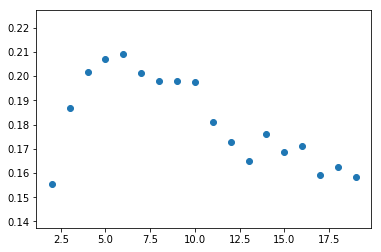

In [116]:
plt.scatter(n_components, scores)
#plt.scatter(n_components, inertias)

# Grados

In [117]:
grados = [i for i in escuelas.columns if 'GRADO_' in i]

In [118]:
escuelas[grados].fillna(0, inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [119]:
escuelas[grados] = escuelas[grados].fillna(0)

In [120]:
escuelas[grados].head()

,GRADO_INFANT,GRADO_TODDLER,GRADO_PK,GRADO_PKE,GRADO_PKM,GRADO_K,GRADO_1,GRADO_2,GRADO_3,GRADO_4,GRADO_5,GRADO_6,GRADO_SGE,GRADO_7,GRADO_8,GRADO_9,GRADO_SGI,GRADO_10,GRADO_11,GRADO_12,GRADO_SGS
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,0.0,71.0,61.0,0.0,12.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,16.0,22.0,20.0,19.0,19.0,19.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,162.0,0.0,198.0,178.0,0.0,38.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,70.0,80.0,112.0,81.0,114.0,108.0,91.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,105.0,0.0,129.0,126.0,105.0,0.0


In [121]:
escuelas['matricula'] = escuelas[grados].sum(axis=1)

In [122]:
grados.extend(['matricula'])

In [123]:
escuelas[grados].shape

(1101, 22)

In [126]:
ss = StandardScaler()
X = ss.fit_transform(escuelas[grados])
pca = PCA(0.95, whiten=True)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

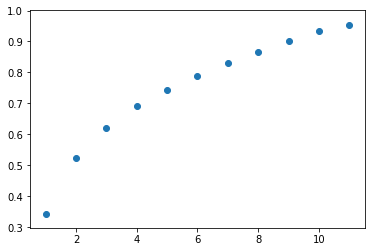

In [127]:
plt.scatter(range(1, pca.n_components_+1), pca.explained_variance_ratio_.cumsum())

In [128]:
X = pd.DataFrame(X, columns=grados)

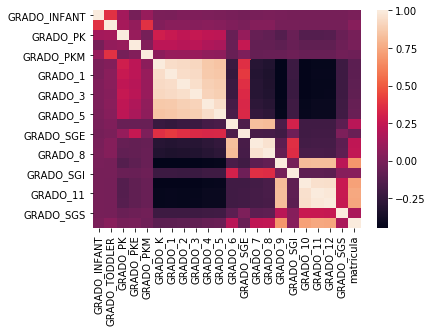

In [129]:
sns.heatmap(X.corr())

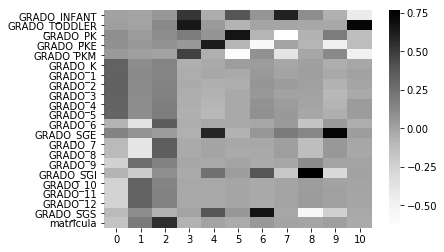

In [130]:
sns.heatmap(pca.components_.transpose(), yticklabels=grados, cmap='Greys')

In [131]:
X_reconstructed = pca.inverse_transform(pca.transform(X)) #this works for new X's. can do something like X_train, X_test and test. 

In [132]:
X_reconstructed = ss.inverse_transform(X_reconstructed)

In [133]:
X_reconstructed = pd.DataFrame(X_reconstructed, columns=grados)

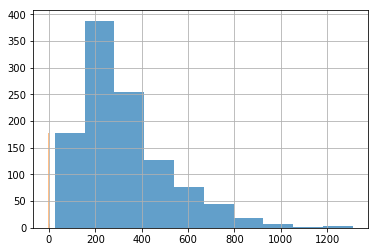

In [134]:
X_reconstructed['matricula'].hist(alpha=0.7)
X['matricula'].hist(alpha=0.5)

In [135]:
grados

['GRADO_INFANT',
 'GRADO_TODDLER',
 'GRADO_PK',
 'GRADO_PKE',
 'GRADO_PKM',
 'GRADO_K',
 'GRADO_1',
 'GRADO_2',
 'GRADO_3',
 'GRADO_4',
 'GRADO_5',
 'GRADO_6',
 'GRADO_SGE',
 'GRADO_7',
 'GRADO_8',
 'GRADO_9',
 'GRADO_SGI',
 'GRADO_10',
 'GRADO_11',
 'GRADO_12',
 'GRADO_SGS',
 'matricula']

In [136]:
materias

['ESPAÑOL_[PROFICIENTE+AVANZADO]',
 'ESPAÑOL_PRE-BÁSICO',
 'ESPAÑOL_BÁSICO',
 'ESPAÑOL_PROFICIENTE',
 'ESPAÑOL_AVANZADO',
 'MATEMÁTICAS_[PROFICIENTE+AVANZADO]',
 'MATEMÁTICAS_PRE-BÁSICO',
 'MATEMÁTICAS_BÁSICO',
 'MATEMÁTICAS_PROFICIENTE',
 'MATEMÁTICAS_AVANZADO',
 'INGLÉS_[PROFICIENTE+AVANZADO]',
 'INGLÉS_PRE-BÁSICO',
 'INGLÉS_BÁSICO',
 'INGLÉS_PROFICIENTE',
 'INGLÉS_AVANZADO']

In [137]:
escuelas_ = escuelas[grados+materias + ['BAJO_NIVEL_POBREZA']]

In [138]:
columnas = escuelas_.columns

In [139]:
escuelas_.head(1)

,GRADO_INFANT,GRADO_TODDLER,GRADO_PK,GRADO_PKE,GRADO_PKM,GRADO_K,GRADO_1,GRADO_2,GRADO_3,GRADO_4,GRADO_5,GRADO_6,GRADO_SGE,GRADO_7,GRADO_8,GRADO_9,GRADO_SGI,GRADO_10,GRADO_11,GRADO_12,GRADO_SGS,matricula,ESPAÑOL_[PROFICIENTE+AVANZADO],ESPAÑOL_PRE-BÁSICO,ESPAÑOL_BÁSICO,ESPAÑOL_PROFICIENTE,ESPAÑOL_AVANZADO,MATEMÁTICAS_[PROFICIENTE+AVANZADO],MATEMÁTICAS_PRE-BÁSICO,MATEMÁTICAS_BÁSICO,MATEMÁTICAS_PROFICIENTE,MATEMÁTICAS_AVANZADO,INGLÉS_[PROFICIENTE+AVANZADO],INGLÉS_PRE-BÁSICO,INGLÉS_BÁSICO,INGLÉS_PROFICIENTE,INGLÉS_AVANZADO,BAJO_NIVEL_POBREZA
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,0.0,71.0,61.0,0.0,12.0,0.0,0.0,0.0,0.0,218.0,21.56,40.83,37.61,14.68,6.88,1.38,45.87,52.75,1.38,0.0,19.27,54.59,26.15,14.22,5.05,86.24


In [140]:
from sklearn.preprocessing import Imputer

In [141]:
imputer = Imputer(strategy='mean')

In [142]:
escuelas_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1101 entries, 0 to 1131
Data columns (total 38 columns):
GRADO_INFANT                          1101 non-null float64
GRADO_TODDLER                         1101 non-null float64
GRADO_PK                              1101 non-null float64
GRADO_PKE                             1101 non-null float64
GRADO_PKM                             1101 non-null float64
GRADO_K                               1101 non-null float64
GRADO_1                               1101 non-null float64
GRADO_2                               1101 non-null float64
GRADO_3                               1101 non-null float64
GRADO_4                               1101 non-null float64
GRADO_5                               1101 non-null float64
GRADO_6                               1101 non-null float64
GRADO_SGE                             1101 non-null float64
GRADO_7                               1101 non-null float64
GRADO_8                               1101 non-null f

In [143]:
escuelas_ = pd.DataFrame(imputer.fit_transform(escuelas_), columns=columnas)

In [144]:
escuelas_ = ss.fit_transform(escuelas_)
pca = PCA(7, whiten=True)
pca.fit(escuelas_)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

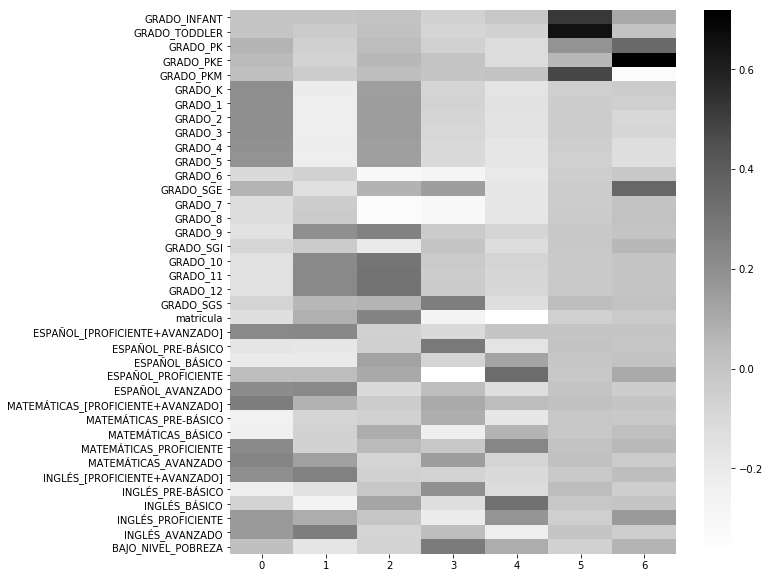

In [145]:
plt.figure(figsize=(10,10))
sns.heatmap(pca.components_.transpose(), yticklabels=columnas, cmap='Greys')

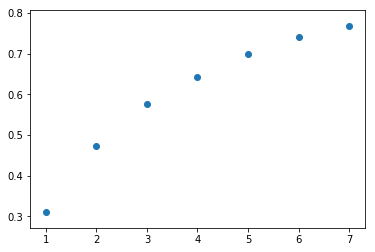

In [146]:
plt.scatter(range(1, pca.n_components_+1), pca.explained_variance_ratio_.cumsum())

In [147]:
escuelas_transformed = pca.fit_transform(escuelas_)
escuelas_transformed = pd.DataFrame(escuelas_transformed, columns=['pca_{}'.format(i) for i in range(1, pca.n_components_+1)])

In [148]:
escuelas_transformed.shape

(1101, 7)

In [149]:
escuelas.shape

(1101, 63)

In [150]:
escuelas_transformed['zona'] = escuelas['ZONA'].map({'URBANA':0, 'RURAL':1})

In [151]:
escuelas_transformed['zona'].value_counts(dropna=False)

 0.0    558
 1.0    514
NaN      29
Name: zona, dtype: int64

In [152]:
escuelas_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101 entries, 0 to 1100
Data columns (total 8 columns):
pca_1    1101 non-null float64
pca_2    1101 non-null float64
pca_3    1101 non-null float64
pca_4    1101 non-null float64
pca_5    1101 non-null float64
pca_6    1101 non-null float64
pca_7    1101 non-null float64
zona     1072 non-null float64
dtypes: float64(8)
memory usage: 68.9 KB


In [153]:
escuelas_transformed.dropna(inplace=True)

In [154]:
escuelas_transformed.head()

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,zona
0,-1.385250,-0.513160,-1.437668,1.076343,-0.420753,0.078281,-0.136909,0.0
1,0.698713,0.622955,-0.236666,-0.641657,1.596086,-0.062021,0.161104,1.0
2,-1.473593,-0.265562,-2.450264,-1.793479,-1.215600,-0.314911,0.190670,1.0
3,0.825007,-2.102608,1.554200,-1.688685,-1.959527,-0.860364,-2.285997,0.0
4,-0.643697,1.722455,0.976187,-1.258237,0.841375,-0.098651,0.356242,0.0


In [155]:
escuelas_transformed.shape

(1072, 8)

In [156]:
pca.n_components_

7

In [157]:
escuelas_transformed.head()

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,zona
0,-1.385250,-0.513160,-1.437668,1.076343,-0.420753,0.078281,-0.136909,0.0
1,0.698713,0.622955,-0.236666,-0.641657,1.596086,-0.062021,0.161104,1.0
2,-1.473593,-0.265562,-2.450264,-1.793479,-1.215600,-0.314911,0.190670,1.0
3,0.825007,-2.102608,1.554200,-1.688685,-1.959527,-0.860364,-2.285997,0.0
4,-0.643697,1.722455,0.976187,-1.258237,0.841375,-0.098651,0.356242,0.0


In [ ]:
#escuelas_transformed.drop('zona', axis=1, inplace=True)

In [158]:
km = KMeans()

In [159]:
km.fit(escuelas_transformed.drop('zona', axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [160]:
km.inertia_

2855.421506540879

In [161]:
silhouette_score(escuelas_transformed.drop('zona', axis=1),km.labels_)

0.2870448371215536

In [162]:
sil_scores = []
inertias = [] 
for n in range(2, 15):
    km = KMeans(n)
    km.fit(escuelas_transformed.drop('zona', axis=1))
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(escuelas_transformed.drop('zona', axis=1), km.labels_))

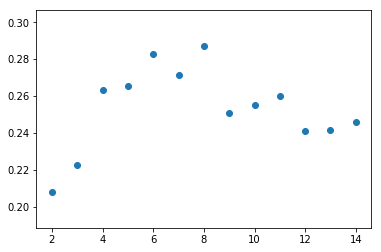

In [163]:
plt.scatter(range(2, 15), sil_scores)

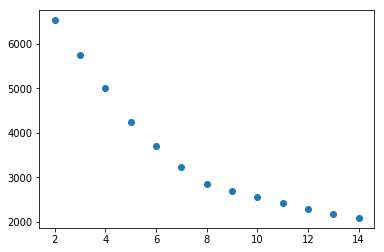

In [164]:
plt.scatter(range(2, 15), inertias)

In [165]:
escuelas_transformed.drop('zona', axis=1).head(1)

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7
0,-1.38525,-0.51316,-1.437668,1.076343,-0.420753,0.078281,-0.136909


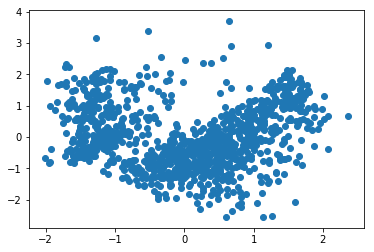

In [166]:
plt.scatter(escuelas_transformed['pca_1'], escuelas_transformed['pca_2'])

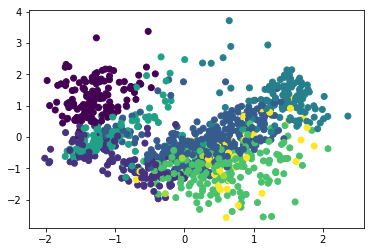

In [169]:
plt.scatter(escuelas_transformed['pca_1'], escuelas_transformed['pca_2'], c = KMeans(8).fit(escuelas_transformed).labels_, cmap='viridis')

# Can we predict urban/rural zone using pca transformed features? 

In [170]:
X = escuelas_transformed[['pca_{}'.format(i) for i in range(1,pca.n_components_+1)]]
y = escuelas_transformed['zona']

In [171]:
from sklearn.model_selection import train_test_split

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [183]:
from sklearn.model_selection import cross_validate

In [184]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [228]:
from sklearn.svm import SVC, LinearSVC

In [233]:
gbc = GradientBoostingClassifier()
rfc = RandomForestClassifier()
lr = LogisticRegression(penalty='l1', C=0.01)
svc = SVC(C=1, kernel='rbf')
lsvc = LinearSVC(penalty='l2')

In [234]:
from sklearn.model_selection import StratifiedKFold

In [235]:
skfold = StratifiedKFold(n_splits=5)

In [236]:
cross_validate(lsvc, X_train, y_train, cv=skfold)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([0.02519965, 0.02593207, 0.02390194, 0.02665901, 0.02511501]),
 'score_time': array([0.00049829, 0.00054669, 0.00063634, 0.00063396, 0.00046182]),
 'test_score': array([0.50617284, 0.54938272, 0.55      , 0.56875   , 0.58125   ]),
 'train_score': array([0.55607477, 0.55919003, 0.54813665, 0.53881988, 0.55590062])}

In [225]:
escuelas.head(1)

,TABLE_ID,CODIGO,ESCUELA,REGION,DISTRITO,MUNICIPIO_ESCOLAR,DIRECCIO_FISICA,DIRECCION_MUNICIPIO,DIRECCIO_ESTADO,DIRECCION_ZIPCODE,GEOLOCALIZACION,TELEFONO,FAX,DIRECTOR,ZONA,ESTATUS_ACTUAL,NIVEL_ORIGINAL,GRADOS_ORIGINAL,GRADOS_POSTERIOR,MATRICULA_TOTAL,GRADO_INFANT,GRADO_TODDLER,GRADO_PK,GRADO_PKE,GRADO_PKM,GRADO_K,GRADO_1,GRADO_2,GRADO_3,GRADO_4,GRADO_5,GRADO_6,GRADO_SGE,GRADO_7,GRADO_8,GRADO_9,GRADO_SGI,GRADO_10,GRADO_11,GRADO_12,GRADO_SGS,ESPAÑOL_[PROFICIENTE+AVANZADO],ESPAÑOL_PRE-BÁSICO,ESPAÑOL_BÁSICO,ESPAÑOL_PROFICIENTE,ESPAÑOL_AVANZADO,MATEMÁTICAS_[PROFICIENTE+AVANZADO],MATEMÁTICAS_PRE-BÁSICO,MATEMÁTICAS_BÁSICO,MATEMÁTICAS_PROFICIENTE,MATEMÁTICAS_AVANZADO,INGLÉS_[PROFICIENTE+AVANZADO],INGLÉS_PRE-BÁSICO,INGLÉS_BÁSICO,INGLÉS_PROFICIENTE,INGLÉS_AVANZADO,BAJO_NIVEL_POBREZA,zipcode,zip,z4,longitud,latitud,matricula
0,1,35295,20 DE SEPTIEMBRE DE 1988,HUMACAO,FAJARDO,VIEQUES,CARR ESTATAL 200 ESQ CARR ESTATAL 993,VIEQUES,PR,00765-1554,"[18.14372, -65.44178]",741-3091,876-2804,MYRIAM R RODRIGUEZ RODRIGUEZ,URBANA,ABIERTA,INTERMEDIO,"7 - 9 , EEI","7 - 9 , EEI",218.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,0.0,71.0,61.0,0.0,12.0,0.0,0.0,0.0,0.0,21.56,40.83,37.61,14.68,6.88,1.38,45.87,52.75,1.38,0.0,19.27,54.59,26.15,14.22,5.05,86.24,"(00765, 1554)",00765,1554,18.14372,-65.44178,218.0


In [226]:
pd.crosstab(escuelas['ZONA'], escuelas['NIVEL_ORIGINAL'] )

NIVEL_ORIGINAL,ELEMENTAL,INTERMEDIO,SECUNDARIO,SEGUNDA UNIDAD,SUPERIOR,TODOS LOS NIVELES
ZONA,,,,,,
RURAL,298,34,16,139,34,2
URBANA,280,129,28,12,119,10


In [227]:
pd.crosstab(escuelas['ZONA'], escuelas['REGION'] )

REGION,ARECIBO,BAYAMON,CAGUAS,HUMACAO,MAYAGUEZ,PONCE,SAN JUAN
ZONA,,,,,,,
RURAL,78,65,85,83,104,82,26
URBANA,56,77,76,70,65,92,142


- - - 
# Admitidos a la Universidad de Puerto Rico

In [ ]:
# Admitidos

# admitidos = pd.read_csv('../data/Admitidos_a_la_Universidad_de_Puerto_Rico_desde_2009_hasta_2013.csv', encoding='utf8')

# admitidos.head()

# admitidos['año_admision'] = admitidos['CALENDARIO'].apply(lambda x: 2000 + int(x.split()[-1].split('-')[0]))
# sns.factorplot(x='año_admision', y='GPA', hue='CAMPUS', data=admitidos)
# plt.xticks(rotation=90)

# #admitidos['INSTITUCION DE PROCEDENCIA'].apply(lambda x: x.split('-')[0])

# #admitidos['INSTITUCION DE PROCEDENCIA'].apply(lambda x: x.split('-')[1])

# Pobreza

In [ ]:
# # Pobreza: # de estudiates bajo el nivel de pobreza en cada escuela publica

# pobreza = pd.read_csv('../data/N_mero_de_estudiantes_bajo_el_nivel_de_pobreza_en_cada_escuela_p_blica__a_o_escolar_2013-2014.csv')

# pobreza.info()

# pobreza['%'] = pobreza['Porcentaje de Estudiantes Bajo el Nivel de Pobreza (BNP)'].str.replace('%', '').astype(float)

# pd.qcut(pobreza['%'], q=5).value_counts().sort_index()

# #80% de las escuelas tienen más de 71.6% estudiantes bajo en nivel de probreza. 

# pobreza = pobreza.iloc[:1442]
# pobreza.groupby('Región').mean()['%']

# pobreza.groupby(['Región', 'Distrito']).mean()['%']

# pobreza['Matrícula M1 entre 5 y 17 años de edad'].hist(alpha=0.5)
# pobreza['M1 entre 5 y 17 años de edad Bajo Nivel Pobreza'].hist(alpha=0.5)
# plt.title('Histograma de Matrícula M1 entre 5 y 17 años de edad\n Todas las escuelas')
# plt.legend(['total', 'bajo el nivel de probreza'])
# plt.axvline(x = pobreza['Matrícula M1 entre 5 y 17 años de edad'].mean(), c='b', ls='dashed')
# plt.axvline(x = pobreza['M1 entre 5 y 17 años de edad Bajo Nivel Pobreza'].mean(), c='g', ls='dashed')
# plt.xlabel('número de estudiantes')
# plt.ylabel('número de escuelas')

# pobreza['Matrícula M1 entre 5 y 17 años de edad'].mean()

# pobreza['M1 entre 5 y 17 años de edad Bajo Nivel Pobreza'].mean()

# pobreza['ratio'] = pobreza['M1 entre 5 y 17 años de edad Bajo Nivel Pobreza']/pobreza['Matrícula M1 entre 5 y 17 años de edad']

# pobreza['ratio'].hist(bins=20)
# plt.axvline(x=pobreza['ratio'].mean(), c='b', ls='dashed')
# plt.axvline(x=pobreza['ratio'].median(), c='b', ls='dotted')

# pd.qcut(pobreza['ratio'], q=5).value_counts().sort_index()

# pobreza['ratio'].mean()

# # Matrícula promedio de una escuela (5 - 17 años) : 283 estudiantes
# # 
# # Matrícula promedio de una escuela (5 - 17 años): Estudiantes Bajo Nivel Pobreza: 218. 
# # 
# # Proporción promedio de estudiantes BNP a estudiantes, 5 - 17 años: 78.5%. 
# # 
# # Alrededor de 80% de las escuelas tienen más de 71.6% de sus estudiantes de 5 - 17 años matriculados bajo el nivel de pobreza.  

# pobreza['ratio_matricula'] = pobreza['Matrícula M1 entre 5 y 17 años de edad']/pobreza['Matrícula M1']

# pobreza['ratio_matricula'].hist()

# pobreza['ratio_matricula'].idxmin()

# # escuelas[escuelas['GRADOS_ORIGINAL'] == '42889']
# # escuelas[escuelas['CODIGO'] == 32300]

# pobreza.iloc[651]

# pobreza[['Código de la Escuela', 'Nombre Escuela']].head()


# pobreza_codigo_nombre = pobreza[['Código de la Escuela', 'Nombre Escuela']]
# pobreza_codigo_nombre.rename(columns={'Código de la Escuela':'codigo', 'Nombre Escuela':'nombre'}, inplace=True)
# #pobreza_codigo_nombre.set_index('codigo', inplace=True)
# pobreza_codigo_nombre.head()

# pobreza_codigo_nombre.shape

# pobreza_codigo_nombre.shape[0] - escuela_codigo_nombre.shape[0]

# # Un dataset es del 2013 y otro del 2017. ¿Se cerraron/consolidaron 310 escuelas desde entonces?

# df = pd.merge(pobreza_codigo_nombre, escuela_codigo_nombre, how='outer', on='codigo', suffixes=('_2013', '_2017'))

# pobreza.head(1)

# pobreza.groupby('Región').mean()['%']

# pobreza.groupby('Distrito').mean()['%'].nlargest(10)

# pobreza.groupby('Municipio Escolar').mean()['%'].nlargest(10)

# pobreza.groupby('Municipio Escolar').mean()['%'].nsmallest(10)

# num_escuelas_municipio_escolar = pobreza.groupby(['Región', 'Distrito', 'Municipio Escolar']).size().to_frame('#')

# num_escuelas_municipio_escolar.shape

# num_escuelas_municipio_escolar['#'].hist()
# plt.axvline(x=num_escuelas_municipio_escolar['#'].mean(), c='b', ls='dashed')
# plt.title('Histograma de numero de escuelas por municipio escolar');
# plt.xlabel('numero de escuelas')
# plt.ylabel('frecuencia')

# Melt

In [ ]:
#Create example dataframe
a = {'a':['a1','a2','a3'],'b':['b1','b2','b3']}
df = pd.DataFrame.from_dict(a)
df = df.T
df = df.reset_index()
df.columns = ['brand','1','2','3']
df = pd.melt(df, id_vars =['brand'])

In [ ]:
df

# Stack

In [ ]:
df.stack()

In [ ]:
df.unstack().to_frame()